In [ ]:
import random as r
import math as m
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def print_matrix(matrix):
    for row in matrix:
        print(row)

# Algorytm Gaussa-Jordana

Implementacja algorytmu Gaussa-Jordana, który wykonuje partial pivoting i jednocześnie zeruje elementy nad i pod przekątną.

In [3]:
def gauss_jordan(matrix):
    n = len(matrix)
    for i in range(n - 1):
        print("Column", i)
        print_matrix(matrix)
        print("\n")
        
        if i < n - 1 - i:
            left_pivot = [-1, -1]
            for j in range(i, n - i):
                if left_pivot[0] < abs(matrix[j][i]):
                    left_pivot[0] = abs(matrix[j][i])
                    left_pivot[1] = j
            
            left_pivot = left_pivot[1]
            
            if left_pivot != i:
                matrix[left_pivot], matrix[i] = matrix[i], matrix[left_pivot]
        
        print("Left pivot swapped")
        print_matrix(matrix)
        print("\n")
        
        val = matrix[i][i]
        matrix[i][i] = 1
        for j in range(i + 1, n + 1):
            matrix[i][j] = matrix[i][j] / val
        
        for j in range(i + 1, n):
            temp = matrix[j][i]
            matrix[j][i] = 0
            for k in range(i + 1, n + 1):
                matrix[j][k] = matrix[j][k] - temp * matrix[i][k]
        
        print("Left column zeroed")
        print_matrix(matrix)
        print("\n")
        
        if i + 1 < n - i - 1:
            right_pivot = [-1, -1]
            for j in range(i + 1, n - i):
                if right_pivot[0] < abs(matrix[j][n - 1 - i]):
                    right_pivot[0] = abs(matrix[j][n - 1 - i])
                    right_pivot[1] = j
            
            right_pivot = right_pivot[1]
            
            if right_pivot != n - 1 - i:
                matrix[right_pivot], matrix[n - 1 - i] = matrix[n - 1 - i], matrix[right_pivot]
        
        print("Right pivot swapped")
        print_matrix(matrix)
        print("\n")
        
        val = matrix[n - 1 - i][n - 1 - i]
        for j in range(i, n + 1):
            matrix[n - 1 - i][j] = matrix[n - 1 - i][j] / val
        
        matrix[n - 1 - i][n - 1 - i] = 1
                
        for j in range(0, n - 1 - i):
            temp = matrix[j][n - 1 - i]
            for k in range(i, n + 1):
                matrix[j][k] = matrix[j][k] - temp * matrix[n - 1 - i][k]
            
            matrix[j][n - 1 - i] = 0
        
        print("Right column zeroed")
        print_matrix(matrix)
        print("\n")
                
            

In [4]:
def read_solution(matrix):
    n = len(matrix)
    for i in range(n):
        print("x" + str(i) + " = " + str(round(matrix[i][n], 3)))

In [5]:
def generate_random_matrix(size, s, t):
    matrix = []
    for _ in range(size):
        row = []
        for _ in range(size + 1):
            row.append(r.uniform(s, t))
        
        matrix.append(row)
    
    return matrix        

In [6]:
test_matrix = [[2, -2, -2, -2], [5, 2, 3, 8], [-1, 3, 4, 4]]
r_matrix = generate_random_matrix(8, 0, 100)
gauss_jordan(test_matrix)
print("\n")
read_solution(test_matrix)

Column 0
[2, -2, -2, -2]
[5, 2, 3, 8]
[-1, 3, 4, 4]


Left pivot swapped
[5, 2, 3, 8]
[2, -2, -2, -2]
[-1, 3, 4, 4]


Left column zeroed
[1, 0.4, 0.6, 1.6]
[0, -2.8, -3.2, -5.2]
[0, 3.4, 4.6, 5.6]


Right pivot swapped
[1, 0.4, 0.6, 1.6]
[0, -2.8, -3.2, -5.2]
[0, 3.4, 4.6, 5.6]


Right column zeroed
[1.0, -0.043478260869565244, 0, 0.8695652173913044]
[0.0, -0.4347826086956519, 0, -1.304347826086956]
[0.0, 0.7391304347826088, 1, 1.2173913043478262]


Column 1
[1.0, -0.043478260869565244, 0, 0.8695652173913044]
[0.0, -0.4347826086956519, 0, -1.304347826086956]
[0.0, 0.7391304347826088, 1, 1.2173913043478262]


Left pivot swapped
[1.0, -0.043478260869565244, 0, 0.8695652173913044]
[0.0, -0.4347826086956519, 0, -1.304347826086956]
[0.0, 0.7391304347826088, 1, 1.2173913043478262]


Left column zeroed
[1.0, -0.043478260869565244, 0, 0.8695652173913044]
[0.0, 1, -0.0, 3.000000000000001]
[0.0, 0, 1.0, -1.0000000000000009]


Right pivot swapped
[1.0, -0.043478260869565244, 0, 0.8695652173913044

# Faktoryzacja LU

Implementacja faktoryzacji **LU** dla macierzy kwadratowej, która działa w miejscu na jednej macierzy zerując elementy pod przekątną i na miejscu zer przechowuje elementy macierzy trójkątnej dolnej. Następnie używam funkcji split_matrices, żeby rozdzielić tą macierz na L i U.

In [7]:
def lu_decomposition(matrix):
    n = len(matrix)
    for i in range(n - 1):  
        pivot = [-1, -1]
        for j in range(i, n):
            if abs(matrix[j][i]) > pivot[0]:
                pivot[0] = matrix[j][i]
                pivot[1] = j
        
        if pivot[1] != i:
            matrix[i], matrix[pivot[1]] = matrix[pivot[1]], matrix[i]
        
        for j in range(i + 1, n):
            val = matrix[j][i] / matrix[i][i]
            matrix[j][i] = val
            for k in range(i + 1, n):
                matrix[j][k] = matrix[j][k] - val * matrix[i][k]

In [8]:
def split_matrices(matrix):
    n = len(matrix)
    lower = [[0 for _ in range(n)] for _ in range(n)]
    upper = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            if i > j:
                lower[i][j] = matrix[i][j]
            
            elif i < j:
                upper[i][j] = matrix[i][j]
            
            else:
                lower[i][j] = 1
                upper[i][j] = matrix[i][j]
    
    return lower, upper

Żeby sprawdzić czy faktoryzacja przebiegła pomyślnie liczę iloczyn **LU**, następnie liczę normę z wyniku i normę z pierwotnej macierzy A i patrzę jaka jest różnica pomiędzy nimi. Problem jest tylko taki że partial pivoting prowadzi do zamiany kolejności wierszy w macierzy na której pracuje, więc iloczyn **LU** będzie się często różnił od **A** kolejnością wierszy i niektóre normy z tych macierzy będą różne (np. norma frobeniusa), więc biorę maksimum z wartości bezwzględnych wszystkich elementów macierzy **A** i **LU** i sprawdzam czy są równe.

In [9]:
test_matrix2 = [[4 ,3 ,2], [4 ,1 ,2], [7, 9, 2]]
def test_lu(matrix):
    A = np.array(matrix)
    lu_decomposition(matrix)
    # print_matrix(matrix)
    # print("\n")
    l1, l2 = split_matrices(matrix)
    
    L = np.array(l1)
    U = np.array(l2)
    
    LU = L @ U
    
    norm_diff = np.amax(A) - np.amax(LU)
    # print_matrix(A)
    # print("\n")
    # print_matrix(LU)
    # print("\n")
    # 
    print("The norm: ", norm_diff)

test_lu(r_matrix)

The norm:  0.0


# Metoda potencjałów węzłowych

W tej metodzie najpierw wybieramy węzeł referencyjny któremu nadamy jakiś potencjał, który będzie punktem odniesienia dla innych węzłów (standardowym wyborem jest 0V). Niewiadomymi stają się potencjały na wszystkich pozostałych węzłach. Dla grafu mającego _n_ węzłów, mamy _n - 1_ niewiadomych. Z pierwszego prawa Kirchoffa układamy _n - 1_ równań dla każdego wierzchołka (pomijamy wierzchołek referencyjny) i rozwiązujemy układ równań żeby znaleźć wszystkie potencjały. Mając potencjały na każdym węźle, z prawa Ohma wyliczamy natężenia na poszczególnych krawędziach.

Funkcja przyjmuje graf jako listę krawędzi, węzeł s, t oraz siłę elektromotoryczną E, a zwraca skierowany graf ważony jako obiekt klasy DiGraph z biblioteki networkx.

Żeby zweryfikować poprawność wyniku, sprawdzam czy suma prądów wypływających z s jest równa sumie prądów wpływających do t.

In [10]:
def calculate_currents(edges, s, t, E):
    num_nodes = max(max(edge[0], edge[1]) for edge in edges) + 1
    Y = np.zeros((num_nodes - 1, num_nodes - 1))
    ground_node = num_nodes - 1
    
    for i, j, res in edges:
        if i == ground_node:
            Y[j][j] += 1/res
        
        elif j == ground_node:
            Y[i][i] += 1/res
        
        else:
            Y[i][i] += 1/res
            Y[i][j] -= 1/res
            Y[j][j] += 1/res
            Y[j][i] -= 1/res
    
    V = np.zeros(num_nodes - 1)
    
    if s != num_nodes - 1:
        V[s] += E
    
    if t != num_nodes - 1:
        V[t] -= E

    potentials = np.linalg.solve(Y, V)
    potentials = np.append(potentials, 0)
            
    G = nx.DiGraph()
    
    sum = 0
    
    for i, j, res in edges:
        if potentials[i] > potentials[j]:
            current = (potentials[i] - potentials[j]) / res
            if i == s:
                sum += current
            if j == t:
                sum -= current
            current = round(current, 2)
            G.add_edge(i, j, weight=current)
        
        else:
            current = (potentials[j] - potentials[i]) / res
            if j == s:
                sum += current
            if i == t:
                sum -= current
            current = round(current, 2)
            G.add_edge(j, i, weight=current)
    
    print("Sum for validation: ", round(sum, 12))
    
    return G

Funkcja draw_solution rysuje wynikowy graf i zaznacza na czerwono krawędzie przez które płynie największy prąd.

Funkcja rysuje graf skierowany żeby było widać w którą stronę płynie prąd, ale z jakiegoś powodu bardzo często przy rysowaniu grafów skierowanych 95% wierzchołków jest umieszczanych praktycznie na sobie w jednym rogu planu, a pozostałe 5% w drugim i nic nie widać.

Żeby to zmienić na graf nieskierowany wystarczy zmienić 30 linię w calculate_currents z G = nx.DiGraph() na G = nx.Graph()

In [11]:
def draw_solution(G, scale=3.0):
    plt.figure(figsize=(12, 12))

    pos = nx.spring_layout(G, scale=scale) 
    
    edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
    
    significant_weight_threshold = sorted(weights)[int(len(weights) * 0.6)]
    edge_colors = ['red' if w >= significant_weight_threshold else 'black' for w in weights]
    
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=300)
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=edge_colors, width=2.5)
    nx.draw_networkx_labels(G, pos, font_size=10)
    
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
    
    plt.axis('off')
    plt.show()

Tutaj zaczynają się funkcje które będą generować i testować implementację metody potencjałów węzłowych na następujących grafach:
- spójny graf losowy
- graf 3-regularny
- dwa grafy losowe połączone mostem
- siatka 2D
- small world

Napisałem jeszcze funkcję, która zapisuje wygenerowany graf do pliku .txt

In [12]:
def save_graph_to_file(edge_list, filename="graph.txt"):
    with open(filename, "w") as file:
        for i, j, weight in edge_list:
            file.write(f"{i} {j} {weight}\n")

    print(f"Graf został zapisany do pliku {filename}.")

In [13]:
def generate_random_graph(n, a, b):
    p = (m.log(n) / n) + 0.3
    G = nx.erdos_renyi_graph(n, p)
    edges_list = list(G.edges())
    edges = []
    for i, j in edges_list:
        edges.append((i, j, r.randint(a, b)))
    
    return edges

In [14]:
def test_random_graph():
    graph = generate_random_graph(10, 1, 20)
    s, t, _ = r.choice(graph)
    E = r.randint(5, 40)
    print(s, t, E)
    g = calculate_currents(graph, s, t, E)
    draw_solution(g)

3 7 10
Sum for validation:  0.0


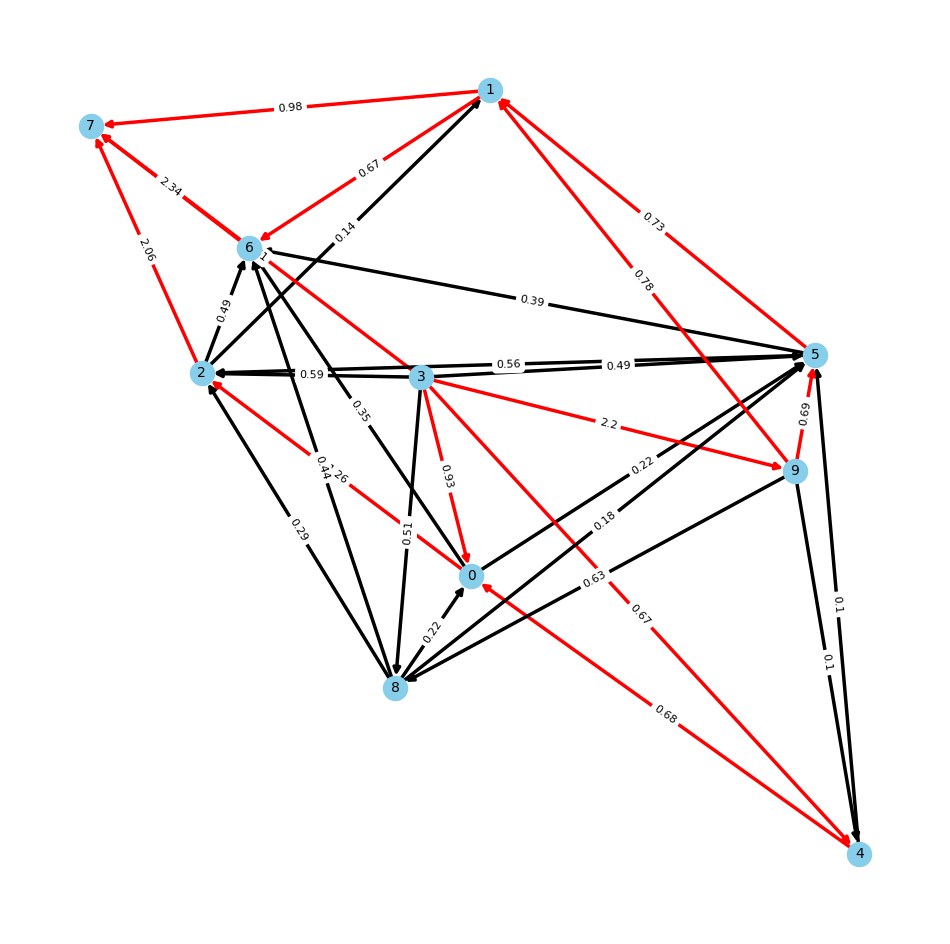

In [15]:
test_random_graph()

In [16]:
def weighted_petersen_graph(a, b):
    G = nx.petersen_graph()
    edges_list = list(G.edges())
    weighted_edges = []
    for i, j in edges_list:
        weighted_edges.append((i, j, r.randint(a, b)))
    
    return weighted_edges

In [17]:
def test_cubic_graph():
    graph = weighted_petersen_graph(1, 20)
    s, t, _ = r.choice(graph)
    E = r.randint(5, 40)
    print(s, t, E)
    g = calculate_currents(graph, s, t, E)
    draw_solution(g)

1 6 17
Sum for validation:  -0.0


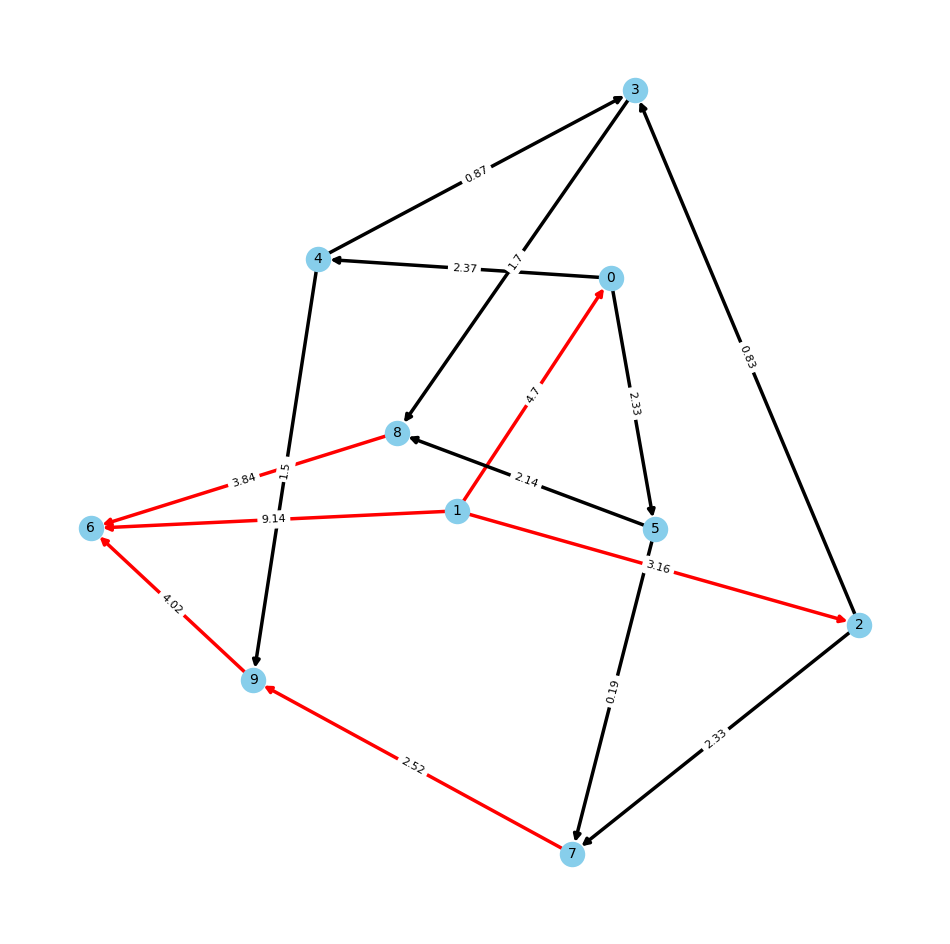

In [18]:
test_cubic_graph()

In [19]:
def generate_bridge_graph(n, a, b):
    x = n // 2
    
    g1 = generate_random_graph(x, a, b)
    temp = generate_random_graph(x, a, b)
    
    g2 = []
    
    for i, j, res in temp:
        g2.append((i + x, j + x, res))
    
    edges = g1 + g2
    
    edges.append((x - 1, x, r.randint(a, b)))

    return edges, 2*x

In [20]:
def test_bridge_graph():
    n = 18
    graph, n = generate_bridge_graph(n, 1, 20)
    s, t, _ = r.choice(graph)
    E = r.randint(5, 40)
    print("Bridge: ", s, t)
    print(s, t, E)
    g = calculate_currents(graph, s, t, E)
    draw_solution(g)

Bridge:  0 6
0 6 15
Sum for validation:  -0.0


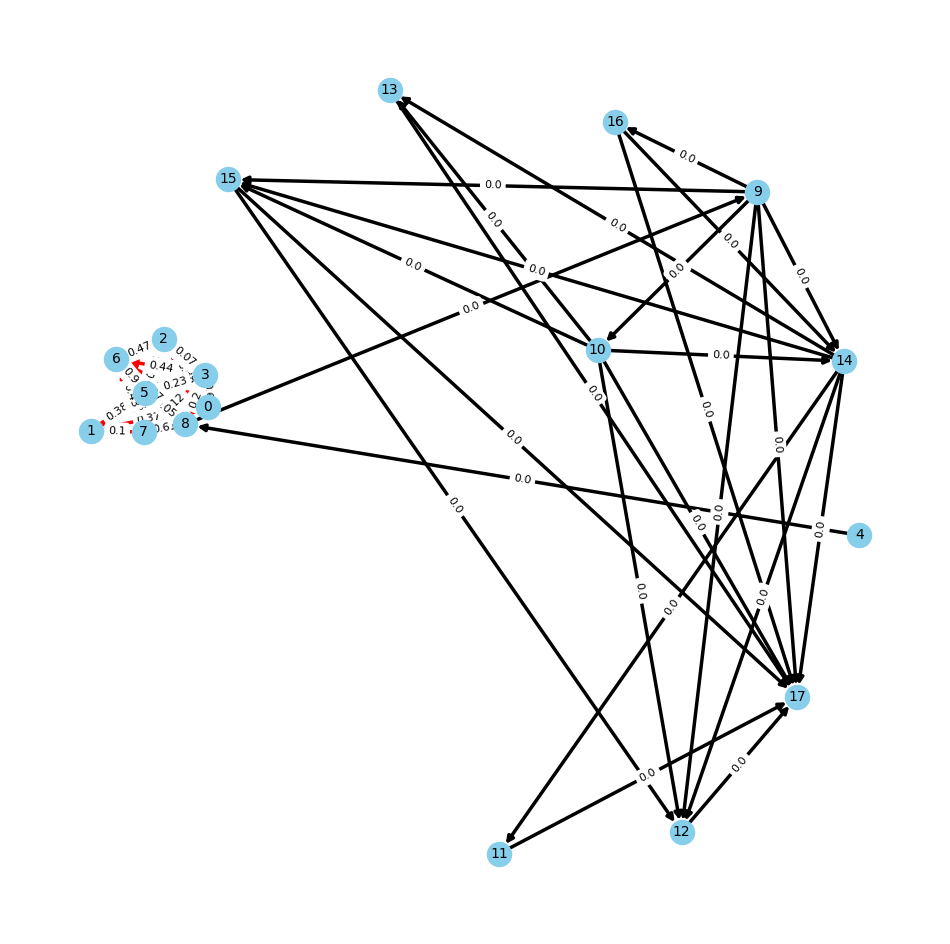

In [21]:
test_bridge_graph()

In [22]:
def generate_random_2dnet(x, a, b):
    G = nx.grid_2d_graph(x, x)
    edges_list = list(G.edges())
    edges = set()
    for p1, p2 in edges_list:
        edges.add(p1)
        edges.add(p2)
    
    edges = list(edges)
    weighted_edges = []
    for i, j in edges_list:
        weighted_edges.append((edges.index(i), edges.index(j), r.randint(a, b)))
    
    return weighted_edges

In [23]:
def test_2dnet():
    graph = generate_random_2dnet(5, 1, 20)
    s, t, _ = r.choice(graph)
    E = r.randint(5, 40)
    print(s, t, E)
    g = calculate_currents(graph, s, t, E)
    draw_solution(g)

10 1 28
Sum for validation:  0.0


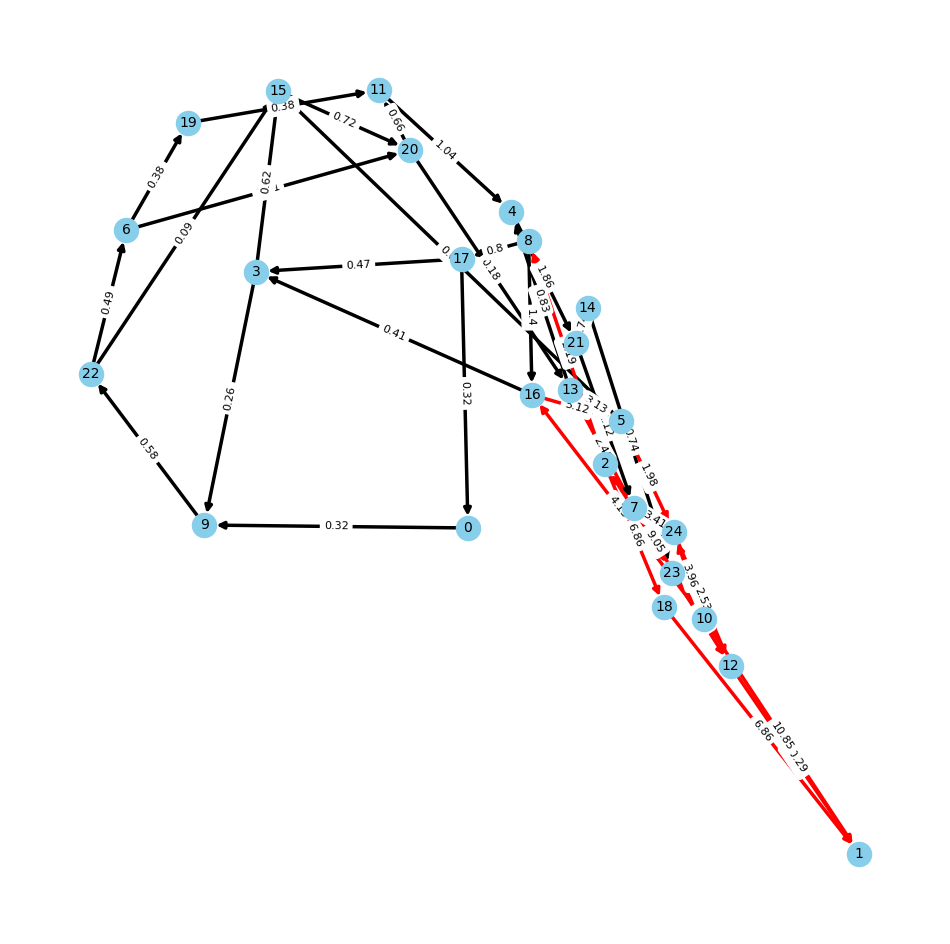

In [24]:
test_2dnet()

In [25]:
def generate_sw_graph(n, a, b):
    k = 4
    p = 0.5
    G = nx.watts_strogatz_graph(n, k, p)
    edges_list = list(G.edges())
    weighted_edges = []
    for i, j in edges_list:
        weighted_edges.append((i, j, r.randint(a, b)))
    
    return weighted_edges

In [26]:
def test_sw_graph():
    graph = generate_sw_graph(30, 1, 20)
    s, t, _ = r.choice(graph)
    E = r.randint(5, 40)
    print(s, t, E)
    g = calculate_currents(graph, s, t, E)
    draw_solution(g)

10 11 19
Sum for validation:  0.0


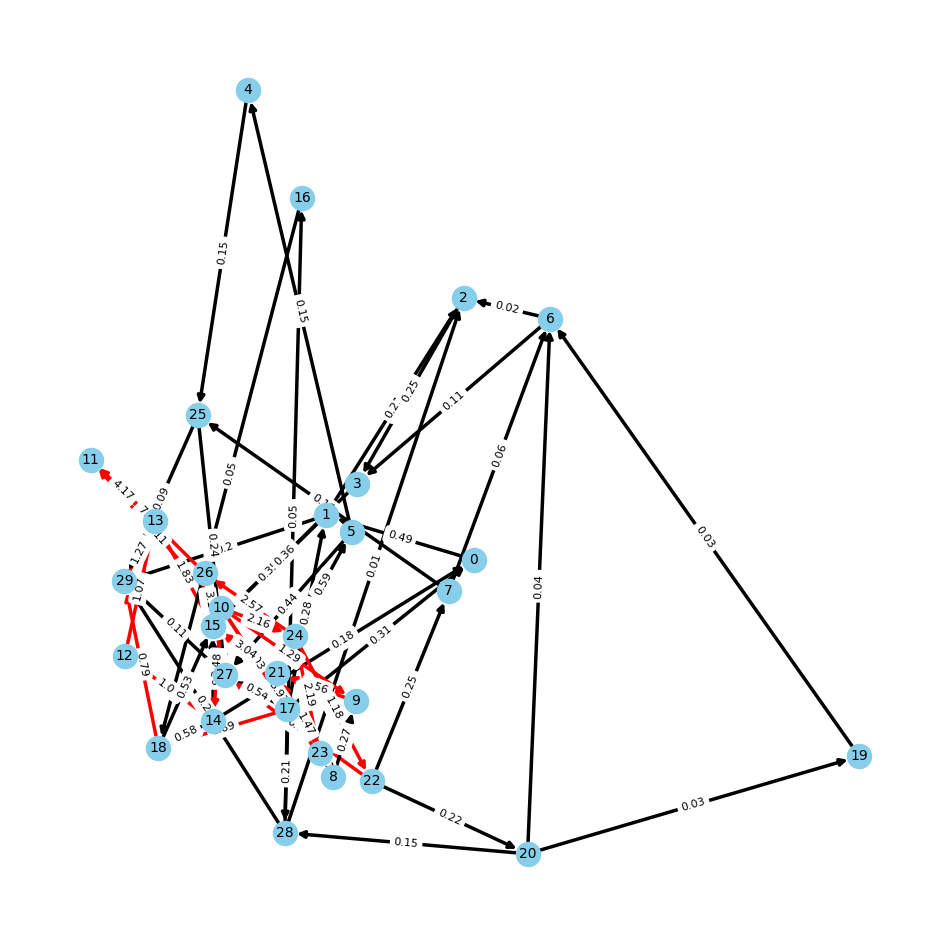

In [27]:
test_sw_graph()